<a href="https://colab.research.google.com/github/saarangmahun/comp215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last Edited On: April 5th 2025

Group Members: Saarang Mahun (ID: 100174005)

Course: COMP215

================================================================================
# **Vancouver Commuter Network Simulation:**
================================================================================

# Code Walkthrough:
1) Create a Graph:

- Define nodes with positions that roughly mimic intersections in Vancouver (coordinates are fictional).

- Edges are added with weights representing travel times between intersections.

- The network is created using NetworkX.


2) Base commute time calculations:

- The function compute_average_commute() calculates the average shortest path (commute time) over all node pairs using Dijkstra’s algorithm.


3) Disruption Simulation:

- A critical edge (e.g., between node 3 and node 4) is removed to simulate a disruption.

- We then recalculate the average commute time to see how it changes.


4) Visualization:

- The networks (before and after disruption) are plotted using matplotlib. Node positions, labels, and edge weights are shown for clarity.

- Results are compared and discussed.

# Pseudocode for this project (Established on March 11 2025):
---

1. Create a graph:
   - Define nodes with positions (representing intersections).
   - Add edges with weights ( representing travel times).

2. Compute baseline:
   - Use Dijkstra’s algorithm to calculate all pairs shortest paths.
   - Compute the average commute time.

3. Disrupt the network:
   - Remove a chosen edge from the network.
   - Recompute the average commute time.

4. Visualize:
   - Plot the original and disrupted networks.
   - Compare metrics to analyze the impact of the disruption.

Let's get to the actual code...


---



- Starting with importing necessary libraries.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt



---


# Now, let's start with Step 1) Creating a Vancouver network:

In [2]:
def create_vancouver_network():
    """
    Creates a simplified network graph of Vancouver intersections.
    Nodes will have positions (x, y) and edges will have weights for travel time.
    """
    G = nx.Graph()

    # Side note: I created 15 nodes with coordinates ranging between 1-6 for
    # easier visualization and tidiness.


    # Define nodes with coordinates (e.g., simulating downtown Vancouver)
    nodes = {
        1: (1, 4),  2: (2, 5),  3: (3, 4.5),  4: (4, 3.5),
        5: (5, 4),  6: (3, 2),  7: (2, 1.5),  8: (4, 1),
        9: (1, 2), 10: (5, 1.5), 11: (6, 3), 12: (6, 5),
        13: (4, 6), 14: (2, 6), 15: (1, 5)
    }

    # Add these nodes to the graph.
    for node, pos in nodes.items():
        G.add_node(node, pos=pos)

    # Define weighted edges (travel times between intersections)
    edges = [
        (1, 2, 3), (1, 15, 2), (2, 3, 2), (2, 14, 4),
        (3, 4, 3), (3, 13, 4), (4, 5, 2), (4, 6, 3),
        (5, 11, 4), (6, 7, 2), (6, 8, 3), (7, 9, 3),
        (8, 10, 3), (9, 15, 2), (10, 11, 2), (11, 12, 3),
        (12, 13, 2), (13, 14, 2), (14, 15, 3)
    ]

    # Add edges with weights to the graph.
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    return G

    # This creates our network and we head to step 2,



---


# Step 2) Calculating average travel time:

 This function will compute the average travel time across all possible routes in graph G using Djikstra's Algorithm:

In [ ]:
def compute_average_commute(G):
    """
    Compute average shortest path length (commute time)
    across all node pairs in graph G.
    """
    # Use Dijkstra's algorithm to calculate the shortest path lengths (sp-length) between all pairs of nodes.
    sp_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
    total = 0
    count = 0
    for u in sp_lengths:
        for v in sp_lengths[u]:
            if u != v:
                total += sp_lengths[u][v]
                count += 1
    return total / count if count > 0 else 0

 In order to keep tidy structure of the code, the comments are provided here.

- The variable "total" stores the sum for all shortest paths.
- The variable ""count" stores the no. shortest paths considered.
- u!= v condition ensures that the shortest path from a node itself is not included in the calculation. (because it's always 0)
- Next, "total" adds paths between different nodes and their neighbors to total.
- "count" is incremented by 1 to keep track of no. of paths.
- Finally, the avg shortest path is found by sum of path lengths by no. of paths. (total/count)
- The if condition is added to avoid division by 0 if the graph has no connections between nodes.

Now we move onto step 3...


---



# Step 3) Simulating a disruption:

We want to cause a disruption to throw off the avg shortest time caluculated by removing an edge. This will require the recalculation of Step 2 and find a new avg shortest travel time. Whether the disruption caused a significant increase in the new shortest avg travel time will be studied.

In [ ]:
def simulate_disruption(G, edge_to_remove):
    """
    Remove an edge from G to simulate a disruption.
    Returns a new graph with the edge removed.
    """
    H = G.copy() # creates a copy of the original graph G
    if H.has_edge(*edge_to_remove): # Checks if edge in question exists in copied graph.
        H.remove_edge(*edge_to_remove)  # Asterisk unpacks the tuple into individual args.
    return H

This wraps up the step 3.
Let's move to Step 4...



---


# Step 4) Visualization functions:

In [5]:
def plot_network(G, title="Vancouver Commuter Network"):
    """
    Plot the graph G with node positions and edge labels for weights.
    """
    pos = nx.get_node_attributes(G, 'pos') # Get the node coordinates.
    plt.figure(figsize=(8, 6)) # Provides a comfortable figure to accomodate the network.
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_labels(G, pos, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

This function will plot the Graph G. We will use it to compare the results after the disruption. I will share an image to show graph G (hope it works)

Let's head to Step 5...

https://drive.google.com/file/d//view?usp=drive_link

![](https://drive.google.com/uc?export=view&id=1Kmnh0B-PsDooxz1tHoNlz4xq3VMzkD41)



---


# Step 5) Main Execution:

Here we will call all of our functions. Let's create the graph G, compute travel time, cause the disruption and compute the new travel time to copare the results.

In [ ]:
# Create the original Vancouver network.
G = create_vancouver_network()
plot_network(G, title="Original Vancouver Network")

# Compute baseline average commute time.
baseline_commute = compute_average_commute(G)
print(f"Baseline average commute time: {baseline_commute:.2f}")

# Simulate a disruption by removing a critical edge (e.g., edge between node 3 and 4).
critical_edge = (3, 4)
G_disrupted = simulate_disruption(G, critical_edge)
plot_network(G_disrupted, title="Vancouver Network after Disruption")

# Compute new average commute time after disruption.
disrupted_commute = compute_average_commute(G_disrupted)
print(f"After disruption, average commute time: {disrupted_commute:.2f}")




---


# Discussing the effect:

- If the average commute time increases significantly, it shows that the removed edge was critical. Developments need to made to those intersections in order to maintain or decrease effects caused by possible disruptions.

- If the disrupted edge doesn't cause significant delays, it is not critical and commuting through those intersection will remain normal.



---


Below is the complete code with all the steps combined:


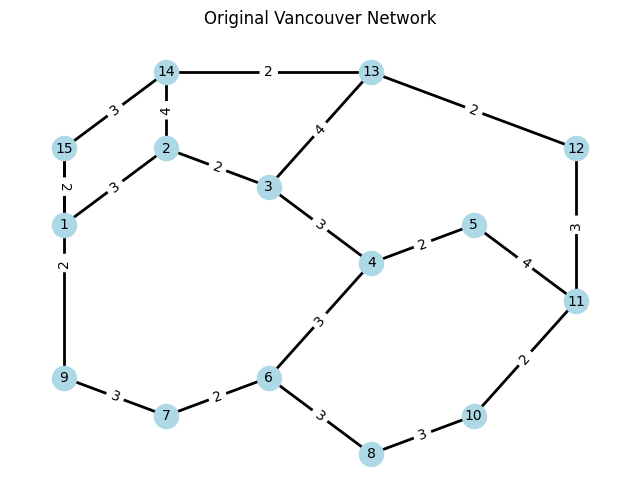

Baseline average commute time: 7.114


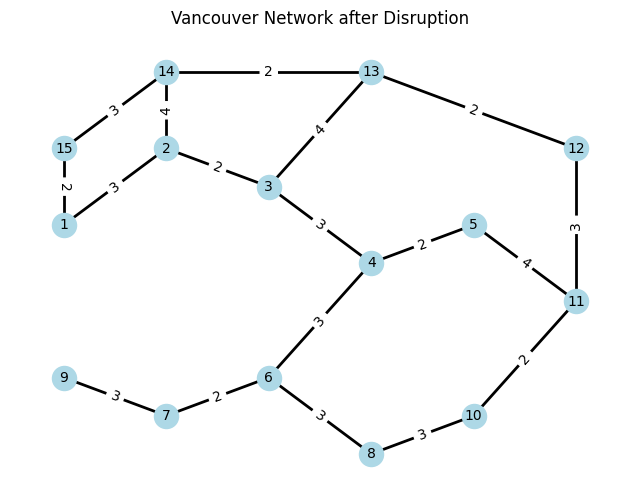

After disruption, average commute time: 8.124


In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create_vancouver_network():
    """
    Create a simplified network graph of Vancouver intersections.
    Nodes have positions (x, y) and edges have weights (travel time).
    """
    G = nx.Graph()

    # Define nodes with coordinates (e.g., simulating downtown Vancouver)
    nodes = {
        1: (1, 4),  2: (2, 5),  3: (3, 4.5),  4: (4, 3.5),
        5: (5, 4),  6: (3, 2),  7: (2, 1.5),  8: (4, 1),
        9: (1, 2), 10: (5, 1.5), 11: (6, 3), 12: (6, 5),
        13: (4, 6), 14: (2, 6), 15: (1, 5)
    }

    # Add nodes to the graph
    for node, pos in nodes.items():
        G.add_node(node, pos=pos)

    # Define weighted edges (travel times between intersections)
    edges = [
        (1, 2, 3), (1, 15, 2), (2, 3, 2), (2, 14, 4),
        (3, 4, 3), (3, 13, 4), (4, 5, 2), (4, 6, 3),
        (5, 11, 4), (6, 7, 2), (6, 8, 3), (7, 9, 3),
        (8, 10, 3), (9, 15, 2), (10, 11, 2), (11, 12, 3),
        (12, 13, 2), (13, 14, 2), (14, 15, 3)
    ]

    # Add edges with weights to the graph.
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    return G

def compute_average_commute(G):
    """
    Compute average shortest path length (commute time)
    across all pairs in graph G.
    """
    sp_lengths = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
    total = 0
    count = 0
    for u in sp_lengths:
        for v in sp_lengths[u]:
            if u != v:
                total += sp_lengths[u][v]
                count += 1
    return total / count if count > 0 else 0

def simulate_disruption(G, edge_to_remove):
    """
    Remove an edge from G to simulate a disruption.
    Returns a new graph with the edge removed.
    """
    H = G.copy()
    if H.has_edge(*edge_to_remove):
        H.remove_edge(*edge_to_remove)
    return H

def plot_network(G, title="Vancouver Commuter Network"):
    """
    Plot the graph G with node positions and edge labels for weights.
    """
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw_networkx_labels(G, pos, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Create the original Vancouver network.
G = create_vancouver_network()
plot_network(G, title="Original Vancouver Network")

# Compute baseline average commute time.
baseline_commute = compute_average_commute(G)
print(f"Baseline average commute time: {baseline_commute:.3f}")

# Simulate a disruption by removing a critical edge (e.g., edge between node 3 and 4).
critical_edge = (9, 15)
G_disrupted = simulate_disruption(G, critical_edge)
plot_network(G_disrupted, title="Vancouver Network after Disruption")

# Compute new average commute time after disruption.
disrupted_commute = compute_average_commute(G_disrupted)
print(f"After disruption, average commute time: {disrupted_commute:.3f}")

================================================================================
# How I got the idea for this project:

- I am currently taking a Geography course along with Comp215 which gave me the motivation to a creative idea of combining the general ideas of computational science to a real-life problem, relevant to Vancouver, with respect to the topics covered in COMP215.



---



# 1) Problem:

- Model Vancouver’s commuter network to study the impact of disruptions on travel times.

# 2) Approach:

- The use NetworkX to create a synthetic graph representing intersections and transit routes.

- Compute average commute times using Dijkstra’s algorithm.

- Simulate a disruption by removing a critical edge.

- Visualize the network before and after the disruption.



---



# Hypothesis and Outcome:

1) Hypothesis: Disruptions increase average commute time.

2) Results: A significant jump in average commute time after the disruption supports the idea that some roads are vital for a well-connected network.

:- Real-World Relevance:

- Gained insights can inform urban planning and highlight the importance of structure in transit networks.



---




# Closer look on the effects:

- If the average commute time increases significantly, it shows that the removed edge was critical for travel time. Developments must take place to minimalize the effects of disruption or at best decrease the travel time.

- In a case of the disruption not causing a jump in average commute time, it is safe to say that the specific edge was not of critical cause, and commute times will not be altered by much.



---



Key Questions:

1) How does the network behave under normal conditions?
- We use a base simulation to calculate the average commute time across all pairs of nodes using the shortest path algorithm.

2) What happens when a critical connection (edge) is removed?
- By simulating a disruption (removing an important edge), we can observe changes in average travel times. This helps in understanding which parts of the network are most critical and what the potential impact of disruptions might be on urban mobility.



---



# What more could be implemented in this project?

- A real time area of Vancouver may be used (e.g. Burnaby), to simulate accurate intersections which will show commute times based on real data.
- With real-time disruptions (e.g. traffic, a festival, maintenance work, an accident), this graphical representation may be enhanced to find out intersections that cause most of the disruption and help develop alternate paths to minimize avg travel time from a point A to B. These nodes may be closer to schools, major public buildings and highways.

- An input function may be implemented to ask the user where they would like to simulate disruptions. This allows to control the disruption factor much more smoothly instead of editing the critical edge parameter everytime.



---

Resources used:

- Textbooks (For Djikstra Algorithm)
- https://www.w3schools.com/python/default.asp (For nx network and graphing )
- Previous Labs (For Djikstra Algorithm)


---
# **THANK YOU!**
================================================================================
